# Performing EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("student.csv")

In [3]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
data.shape

(1000, 8)

**Data contains 1000 rows and 8 columns or features**

In [5]:
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

**Concluding data types of every features**

1. **gender**                         Cat--> Nominal
2. **race/ethnicity**                 Cat--> Nominal
3. **parental level of education**    Cat--> Ordinal
4. **lunch**                          Cat--> Nominal
5. **test preparation course**        Cat--> Nominal
6. **math score**                    Numeric--> Continuous
7. **reading score**                  Numeric--> Continuous 
8. **writing score**                  Numeric--> Continuous

## Find the list of all features

In [6]:
[col for col in data.columns]

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score']

## Sagregate the data

In [7]:
cat_col = [col for col in data.columns if data[col].dtypes == "O"]
cat_col

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [8]:
num_col = [col for col in data.columns if data[col].dtypes != 'O']
num_col

['math score', 'reading score', 'writing score']

**Two separate list are created**

"cat_col" list contains the name of all those columns for which data type is Object or Catagorical

"num_col" contains the name of all those columns for which data type is Numerical.

## check memory usages

In [9]:
data.memory_usage()

Index                           128
gender                         8000
race/ethnicity                 8000
parental level of education    8000
lunch                          8000
test preparation course        8000
math score                     8000
reading score                  8000
writing score                  8000
dtype: int64

## Check missing values

### total number of missing values (columnwise)

In [10]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### total number of missing values (dataset wise)

In [11]:
data.isnull().sum().sum()

0

**No null values detected**

## Check if there are any Duplicate rows

In [12]:
data.duplicated().sum()

0

**Conclusion** - No Duplicate rows were found

## Find the number of Unique values per column

In [13]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [14]:
data['gender'].unique()

array(['female', 'male'], dtype=object)

# Statistical Analysis

## Basic stat info of Numerical features

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


**Note** 
Last 5 columns in the above table represent the dispersion of the data

## Corelation

**Defination** : Correlation is a statistical measure that expresses the extent to which two variables are linearly related (meaning they change together at a constant rate). It’s a common tool for describing simple relationships without making a statement about cause and effect.

In [16]:
data.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


**Conclusion**

All the corelation values are positive that means with increase in any feature the other features are also increasing.

## Covariance

**Defination** : Covariance is a measure of the relationship between two random variables and to what extent, they change together. Or we can say, in other words, it defines the changes between the two variables, such that change in one variable is equal to change in another variable.

In [17]:
data.cov()

,math score,reading score,writing score
math score,229.918998,180.998958,184.939133
reading score,180.998958,213.165605,211.786661
writing score,184.939133,211.786661,230.907992


**Conclusion**

A higher number denotes higher dependency i.e. reading and writing score are highly dependent on each other where as math and reading score are less dependent on each other.

## Check Skewness of the Data

In [18]:
data.skew()

math score      -0.278935
reading score   -0.259105
writing score   -0.289444
dtype: float64

**Conclusion**:

Negative Skew value denotes that our data is Left-Skewed.

### Now let's verify the skewness with Graph

<AxesSubplot:xlabel='math score', ylabel='Density'>

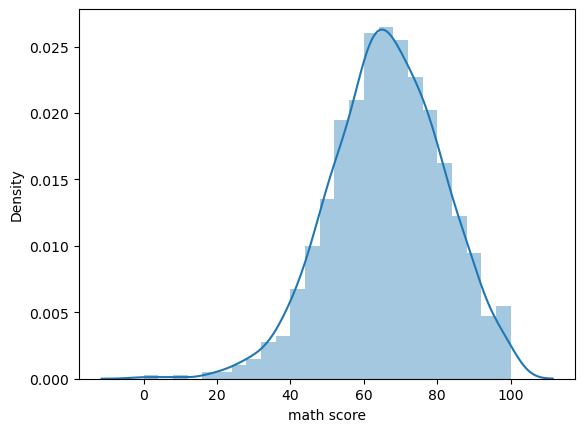

In [19]:
sns.distplot(data['math score'])

<AxesSubplot:xlabel='reading score', ylabel='Density'>

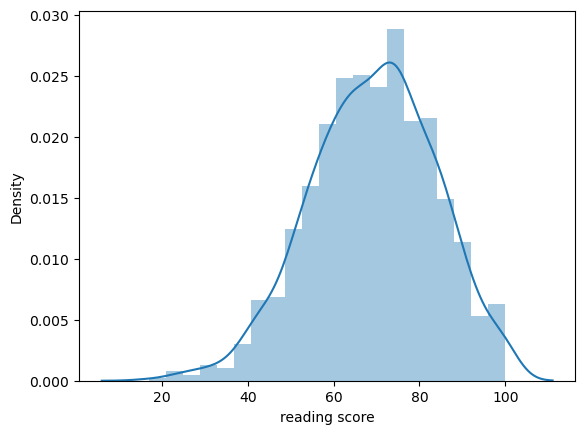

In [20]:
sns.distplot(data['reading score'])

<AxesSubplot:xlabel='writing score', ylabel='Density'>

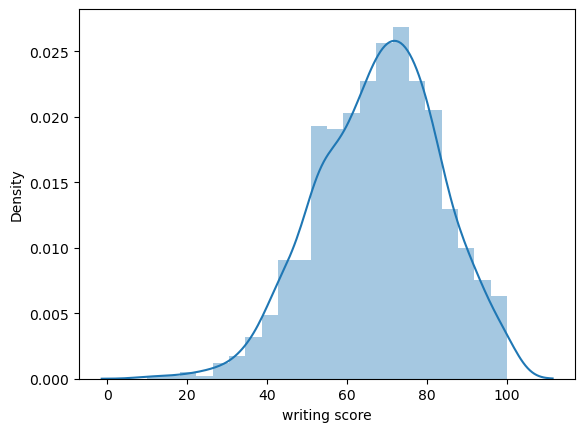

In [21]:
sns.distplot(data['writing score'])

## Insert a new Feature or Column

In [22]:
data["avg score"] = round((data['math score']+data['reading score']+data['writing score'])/3, 2)
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33


## Performing groupby operation

In [23]:
data.groupby('gender').count()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg score
gender,,,,,,,,
female,518,518,518,518,518,518,518,518
male,482,482,482,482,482,482,482,482


In [24]:
data.groupby('gender').mean()

,math score,reading score,writing score,avg score
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837303


**Conclusion**

By this way we can find the count of a specific catagory.

Here w.r.t "gender" column we can find that total female count = 518 and male count = 482 in our dataset.

Along with that we can also find the average math score of girls = 63.6 where as the same for boys = 68.7

### We can answer specific question releated to dataset

**Question**

Find the number of students with math score < 30.

Also find how many of them are boys and how many are girls.

In [25]:
data['math score'][data['math score'] < 30].count()

14

In [26]:
data[data['math score'] < 30 ].groupby('gender')['math score'].count()

gender
female    12
male       2
Name: math score, dtype: int64

## Using scipy.stats Module

In [27]:
num_data = data[num_col]
num_data.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [28]:
from scipy.stats import normaltest

In [29]:
p = normaltest(data["math score"])[1]*100

In [30]:
if p > 0.05:
    print("'math score' feature is Normally distributed as p = ", round(p,4))
else:
    print("'math score' feature is non-Normally distributed as p = ", round(p,4))

'math score' feature is non-Normally distributed as p =  0.0451


### Let's Verify the result with Graph

<AxesSubplot:xlabel='math score', ylabel='Density'>

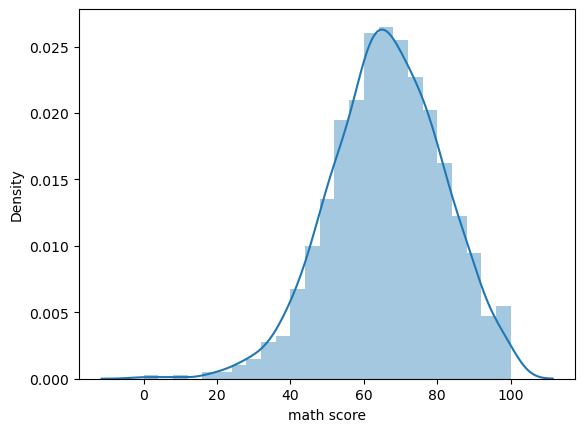

In [31]:
sns.distplot(data["math score"])

**Conclusion**

We can see in the graph that the data is not perfect Normal Distribution as it slightly Left-skewed

## Outlier Detection

<AxesSubplot:>

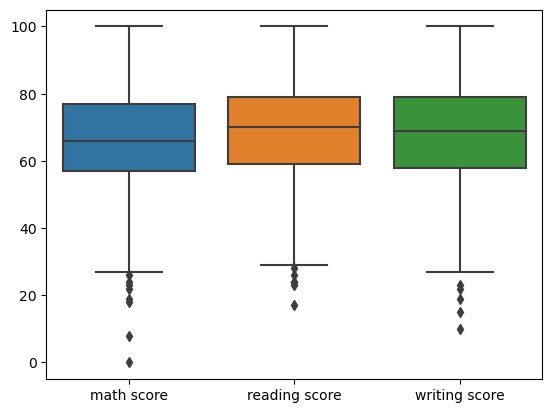

In [32]:
sns.boxplot(data=data[num_col])

**Conclusion**

In Boxplots, the Dots beyond the vertical lines represent the Outliers.

### Outlier detection with  Inter Quartile Range

In [33]:
q1 = data['math score'].quantile(0.25)
q3 = data['math score'].quantile(0.75)
IQR = q3 - q1

In [34]:
data['math score'].max()

100

In [35]:
u_limit = q3 + (1.5*IQR)
u_limit

107.0

In [36]:
data['math score'].min()

0

In [37]:
l_limit = q1 - (1.5*IQR)
l_limit

27.0

In [38]:
data[data['math score']< l_limit]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg score
17,female,group B,some high school,free/reduced,none,18,32,28,26.00
59,female,group C,some high school,free/reduced,none,0,17,10,9.00
145,female,group C,some college,free/reduced,none,22,39,33,31.33
338,female,group B,some high school,free/reduced,none,24,38,27,29.67
466,female,group D,associate's degree,free/reduced,none,26,31,38,31.67
787,female,group B,some college,standard,none,19,38,32,29.67
842,female,group B,high school,free/reduced,completed,23,44,36,34.33
980,female,group B,high school,free/reduced,none,8,24,23,18.33


In [39]:
data[data['math score'] > u_limit]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg score


**Conclusion**

Any data point beyond Upperlimit or Lower Limit can be treated as outliers.

In case of "math score" feature, maximum score is 100. So, there are no uotliers beyond the Upper Limit.
But minimum score is 0 and our Lower Limit is 27.

So, we can treat those students with score below 27 in maths as "Outliers" for this particular dataset.

### Function to find the Outliers

In [40]:
def upper_lower_fence(data, column, q1, q3):
    """
    data : dataframe
    column : column name
    q1, q3 : percentile value
    """
    Q1 = data[column].quantile(q1)
    Q3 = data[column].quantile(q3)
    IQR = Q3 - Q1
    u_fence = round(Q3 + (1.5*IQR), 3)
    l_fence = round(Q1 - (1.5*IQR), 3)
    return l_fence, u_fence

for column in num_col:
    l_fence, u_fence =  upper_lower_fence(num_data, column, 0.15, 0.85)
    print("Outliers of the feature - ", column, '\n')
    print(num_data[data[column]< l_limit], '\n')
    print(num_data[data[column]> u_limit], '\n', '*'*50)

Outliers of the feature -  math score 

     math score  reading score  writing score
17           18             32             28
59            0             17             10
145          22             39             33
338          24             38             27
466          26             31             38
787          19             38             32
842          23             44             36
980           8             24             23 

Empty DataFrame
Columns: [math score, reading score, writing score]
Index: [] 
 **************************************************
Outliers of the feature -  reading score 

     math score  reading score  writing score
59            0             17             10
76           30             26             22
327          28             23             19
596          30             24             15
980           8             24             23 

Empty DataFrame
Columns: [math score, reading score, writing score]
Index: [] 
 ************

In [41]:
for column in num_col:
    print(column, '\n', upper_lower_fence(num_data, column, 0.20, 0.80), '\n')

math score 
 (14.0, 118.0) 

reading score 
 (19.5, 119.5) 

writing score 
 (13.5, 121.5) 



## Graphical Analysis

In [43]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33


### Countplot of Catagorical Features

<AxesSubplot:xlabel='gender', ylabel='count'>

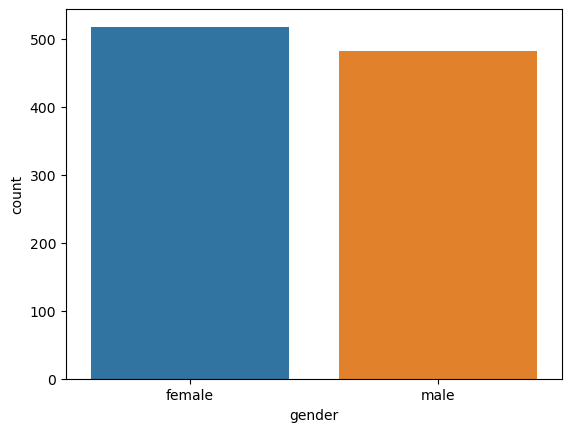

In [44]:
sns.countplot(data['gender'])

<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

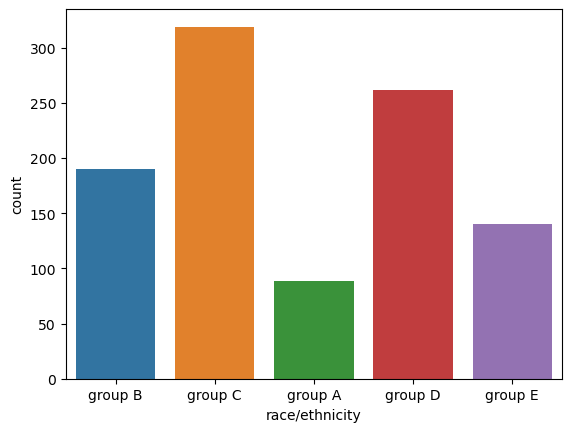

In [45]:
sns.countplot(data['race/ethnicity'])

<AxesSubplot:xlabel='parental level of education', ylabel='count'>

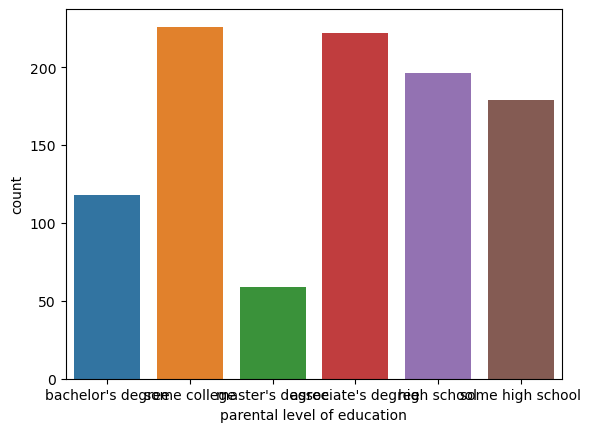

In [46]:
sns.countplot(data['parental level of education'])

<AxesSubplot:xlabel='lunch', ylabel='count'>

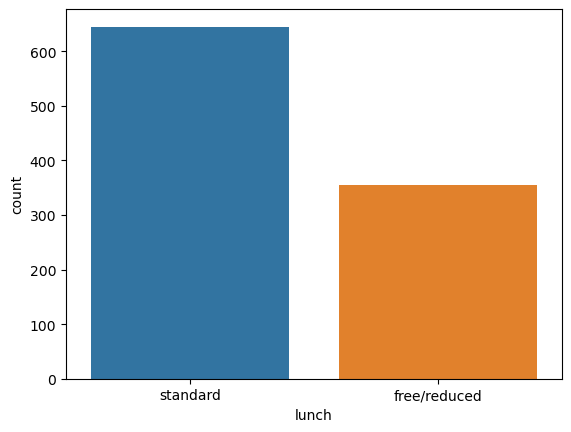

In [47]:
sns.countplot(data['lunch'])

<AxesSubplot:xlabel='test preparation course', ylabel='count'>

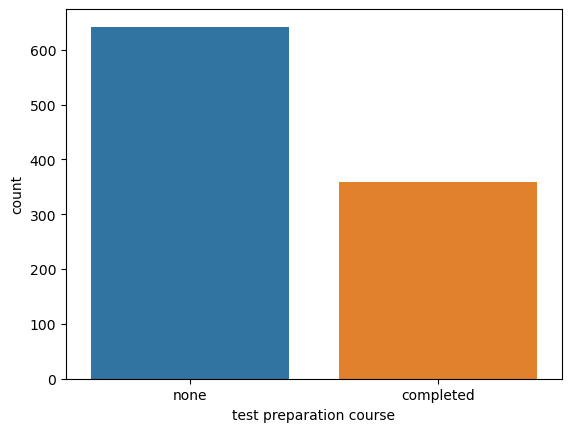

In [48]:
sns.countplot(data['test preparation course'])

<AxesSubplot:xlabel='math score', ylabel='Count'>

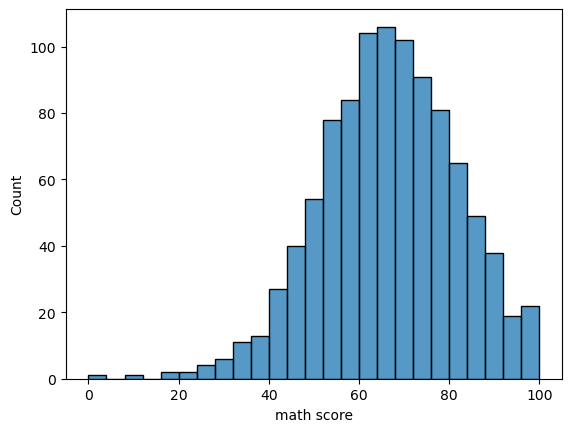

In [50]:
sns.histplot(data['math score'])

### Compare scores || male vs female

In [55]:
df = data.groupby('gender').mean().T
df

gender,female,male
math score,63.633205,68.728216
reading score,72.608108,65.473029
writing score,72.467181,63.311203
avg score,69.569498,65.837303


<AxesSubplot:>

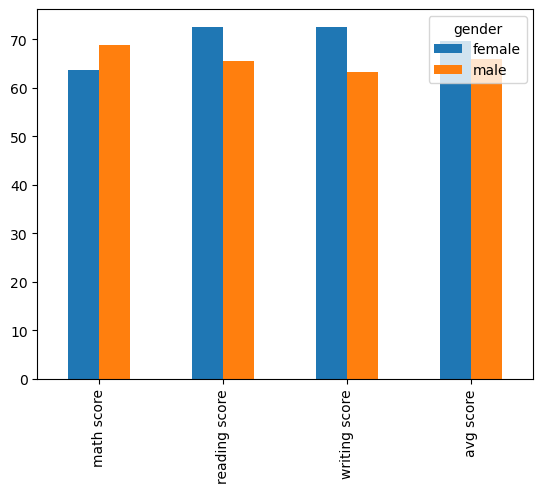

In [60]:
df.plot(kind='bar')

### math score > 80 | female vs male

In [81]:
df2=data[['gender','math score']][data['math score']>80].groupby('gender').count().T
df2         

gender,female,male
math score,68,108


<AxesSubplot:>

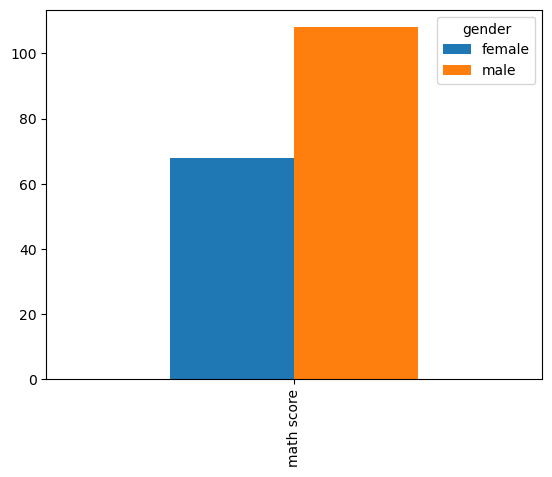

In [82]:
df2.plot(kind='bar')

Text(0.5, 1.0, 'Corelation between variables')

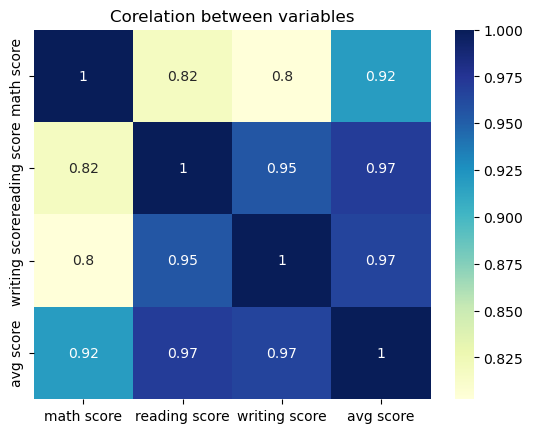

In [85]:
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.title("Corelation between variables")